In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

In [3]:
#Loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('mail_data.csv')

In [4]:
raw_mail_data.head

<bound method NDFrame.head of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [5]:
raw_mail_data.shape

(5572, 2)

In [6]:
 #Replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [7]:
#Label spam mail as 0;  ham mail as 1;
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [8]:
 #Separating the data as texts and label
#X-input
#Y-Output/target
X = mail_data['Message']
Y = mail_data['Category']

In [9]:
#Splitting the data into training data & test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [10]:
#Transform the text data to feature vectors that can be used as input to the Logistic regression
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

In [11]:
#Splited X has string values, those need to be fit & converted to integer
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [12]:
#Convert Y_train and Y_test values as integers [convert object type to int]
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [13]:
#Training the Model
model = LogisticRegression()

In [14]:
#Training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

In [15]:
#Prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [16]:
#Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
# Accuracy on training data
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print("Accuracy on Training Data:", accuracy_on_training_data)

Accuracy on Training Data: 0.9670181736594121


In [19]:
# Accuracy on test data
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print("Accuracy on Test Data:", accuracy_on_test_data)

Accuracy on Test Data: 0.9659192825112107


In [20]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[117  38]
 [  0 960]]


In [21]:
# Classification Report
class_report = classification_report(Y_test, prediction_on_test_data)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       155
           1       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [22]:
# Conclusion Information
if accuracy_on_test_data > 0.8:
    conclusion = "The model performs well on the test data."
else:
    conclusion = "The model may need further tuning as the accuracy is below the desired threshold."

print("\nConclusion:", conclusion)


Conclusion: The model performs well on the test data.


In [23]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [24]:

# Calculate F1-score
f1_train = f1_score(Y_train, prediction_on_training_data)
f1_test = f1_score(Y_test, prediction_on_test_data)

In [25]:
print(f"F1-Score on Training Data: {f1_train}")
print(f"F1-Score on Test Data: {f1_test}")

F1-Score on Training Data: 0.98131910026687
F1-Score on Test Data: 0.9805924412665985


In [26]:
# Calculate AUC-ROC
prediction_on_training_data_prob = model.predict_proba(X_train_features)[:, 1]
prediction_on_test_data_prob = model.predict_proba(X_test_features)[:, 1]

roc_auc_train = roc_auc_score(Y_train, prediction_on_training_data_prob)
roc_auc_test = roc_auc_score(Y_test, prediction_on_test_data_prob)

print(f"AUC-ROC Score on Training Data: {roc_auc_train}")
print(f"AUC-ROC Score on Test Data: {roc_auc_test}")

AUC-ROC Score on Training Data: 0.9981307471766722
AUC-ROC Score on Test Data: 0.9933467741935483


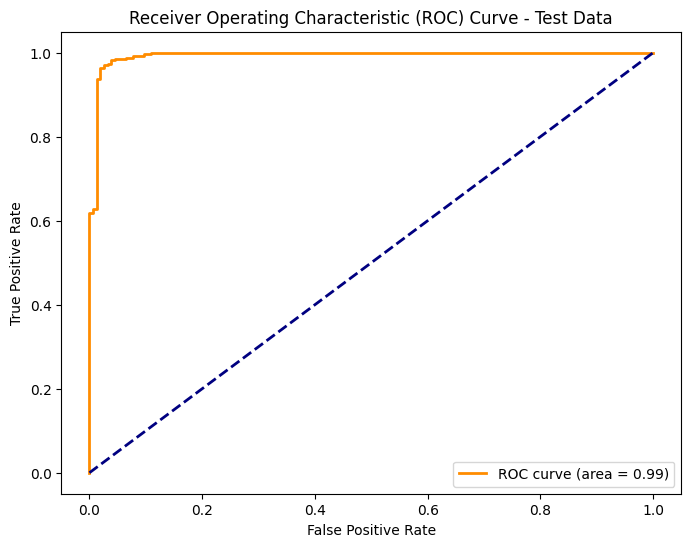

In [27]:
# Plot ROC Curve for test data
fpr, tpr, _ = roc_curve(Y_test, prediction_on_test_data_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc='lower right')
plt.show()